In [1]:
import json

import gensim
from gensim.models import Word2Vec

import pandas as pd

import nltk
from nltk.stem import WordNetLemmatizer

import re

from sklearn.decomposition import PCA, KernelPCA

import matplotlib.pyplot as plt

import numpy as np

c:\users\yasht\fakenews\venv\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
# nltk.download('punkt')
# nltk.download('stopwords')


# Loading reviews

In [2]:
# Read reviews
# Data obtained from https://jmcauley.ucsd.edu/data/amazon/
with open('Musical_Instruments_5.json') as data_file:
    def load_review(line):
        review = json.loads(line)
        return [float(review['overall']), review['reviewText']]
    reviews = list(map(load_review, data_file))

In [3]:
reviews[0]

[5.0,
 "Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,"]

In [4]:
review_df = pd.DataFrame(reviews, columns=['Rating', 'Text'])

In [5]:
review_df

,Rating,Text
0,5.0,"Not much to write about here, but it does exac..."
1,5.0,The product does exactly as it should and is q...
2,5.0,The primary job of this device is to block the...
3,5.0,Nice windscreen protects my MXL mic and preven...
4,5.0,This pop filter is great. It looks and perform...
...,...,...
10256,5.0,"Great, just as expected. Thank to all."
10257,5.0,I've been thinking about trying the Nanoweb st...
10258,4.0,I have tried coated strings in the past ( incl...
10259,4.0,"Well, MADE by Elixir and DEVELOPED with Taylor..."


In [6]:
en_stop = set(nltk.corpus.stopwords.words('english'))
stemmer = WordNetLemmatizer()

def tokenize(text):
    text = text.lower()
    # Remove non-word characters
    text = re.sub(r'[^a-z]', ' ', text)
    # Remove single characters
    text = re.sub(r'\b[a-z]\b', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Lemmatization
    tokens = text.split()
    tokens = [stemmer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if len(word) >= 3 and word not in en_stop]
    
    return tokens

In [7]:
tokenized_texts = list(map(tokenize, review_df['Text']))

In [8]:
str(tokenized_texts[:2])

"[['much', 'write', 'doe', 'exactly', 'supposed', 'filter', 'pop', 'sound', 'recording', 'much', 'crisp', 'one', 'lowest', 'price', 'pop', 'filter', 'amazon', 'might', 'well', 'buy', 'honestly', 'work', 'despite', 'pricing'], ['product', 'doe', 'exactly', 'quite', 'affordable', 'realized', 'double', 'screened', 'arrived', 'even', 'better', 'expected', 'added', 'bonus', 'one', 'screen', 'carry', 'small', 'hint', 'smell', 'old', 'grape', 'candy', 'used', 'buy', 'reminiscent', 'sake', 'cannot', 'stop', 'putting', 'pop', 'filter', 'next', 'nose', 'smelling', 'recording', 'dif', 'needed', 'pop', 'filter', 'work', 'well', 'expensive', 'one', 'may', 'even', 'come', 'pleasing', 'aroma', 'like', 'mine', 'buy', 'product']]"

# Creating w2v model

In [9]:
model_file = 'musical_instruments_review_word2vec_len3.model' # change every time!

In [10]:
# model = Word2Vec(sentences=tokenized_texts)
# model.save(model_file)

In [11]:
model = Word2Vec.load(model_file)

# PCA stuff

In [12]:
vocab = np.array(list(model.wv.key_to_index.keys()))
num_words, = vocab.shape
print('Vocab has ', num_words, 'words')
vocab[:10]

Vocab has  5352 words


array(['guitar', 'one', 'string', 'sound', 'great', 'like', 'good', 'use',
       'pedal', 'well'], dtype='<U15')

In [13]:
vectors = model.wv[model.wv.index_to_key]

In [14]:
pd.DataFrame(vectors)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.614343,0.488139,0.772052,-0.002569,-0.674580,-1.470332,-0.495658,-0.195630,0.008010,0.207078,...,0.485420,-0.320796,0.197416,0.143767,0.559240,0.715567,-0.558964,0.805933,-0.510249,0.022898
1,0.039033,-0.010707,0.298169,-0.260730,-0.249594,-0.846963,-0.510082,0.392693,-0.409967,-0.388688,...,-0.340968,0.377866,-0.284890,-0.144340,-0.326031,0.149230,-0.143424,0.525890,-0.203798,0.376248
2,0.388668,2.187849,0.395199,-0.179747,-0.351310,-1.120154,0.371329,1.198177,1.475197,-0.117167,...,1.136428,0.354706,0.281014,-0.002498,0.541059,0.984794,-1.223026,-0.446879,0.717248,0.040473
3,0.446773,1.789409,0.026896,0.545127,0.628971,-0.390700,1.004568,1.359485,0.753583,-1.096641,...,0.985497,0.851581,0.853598,0.271567,0.187432,0.650604,0.258975,0.037298,-0.327179,-0.796606
4,0.336516,-0.057997,-0.078187,0.539876,0.026997,-0.154860,0.018858,0.687829,-0.123362,0.442210,...,0.170501,0.159002,0.237209,0.048241,0.200624,-1.127668,0.123737,0.785334,-0.336422,0.167563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,-0.005638,0.045417,-0.003012,0.004624,0.017924,-0.044492,-0.008495,0.069548,-0.008526,-0.009445,...,0.010474,0.012147,0.001727,0.015503,0.044808,0.018727,-0.003617,-0.010349,-0.012757,0.004160
5348,0.008682,0.072496,0.016032,-0.027734,0.013990,-0.100146,-0.010529,0.122256,-0.034664,-0.010503,...,0.053258,0.023202,-0.002827,0.009491,0.092655,0.045700,0.009233,-0.018406,-0.021970,-0.004381
5349,0.004303,0.053210,0.028906,-0.036759,-0.008029,-0.092137,-0.019506,0.114803,-0.018481,-0.019594,...,0.017046,0.036439,-0.003559,0.015374,0.041854,0.025719,-0.007031,-0.005005,-0.020646,0.015278
5350,0.017631,0.080970,0.024810,-0.015506,0.017699,-0.094154,0.006302,0.089393,-0.007363,-0.025395,...,0.048309,0.044499,0.013085,0.003266,0.059853,0.044589,-0.008716,-0.018859,-0.020540,0.001932


In [15]:
def try_pca(pca):
    pca = pca.fit(vectors)
    top = pca.explained_variance_ratio_
    print(top, sum(top))
    return pca

In [16]:
pca1 = try_pca(PCA(n_components=2))

[0.27380309 0.1645337 ] 0.4383367896080017


In [17]:
pca2 = try_pca(PCA(n_components=3))

[0.27380317 0.16453385 0.12288418] 0.5612212046980858


In [ ]:
pca3 = try_pca(PCA(n_components=3, svd_solver='arpack'))

[0.27380309 0.16453381 0.12288411] 0.5612210035324097


In [ ]:
pca4 = try_pca(PCA(n_components=3, svd_solver='full'))

[0.27380276 0.16453373 0.12288388] 0.5612203702330589


In [ ]:
pca4 = try_pca(PCA(n_components=3, svd_solver='randomized'))

[0.27380309 0.16453378 0.12288407] 0.5612209364771843


In [ ]:
pca5 = try_pca(PCA(n_components=4, svd_solver='arpack'))

[0.273803   0.16453378 0.12288412 0.11539946] 0.6766203567385674


In [ ]:
pca6 = try_pca(PCA(n_components=4, svd_solver='full'))

[0.27380276 0.16453373 0.12288388 0.1153993 ] 0.6766196712851524


In [ ]:
pca7 = try_pca(PCA())

[2.7380276e-01 1.6453373e-01 1.2288388e-01 1.1539930e-01 8.6197175e-02
 5.1898073e-02 3.2899339e-02 3.0900786e-02 2.1327814e-02 1.6329339e-02
 1.4263014e-02 1.2851440e-02 1.2157113e-02 7.2173681e-03 6.2267291e-03
 4.3888632e-03 3.9077168e-03 3.1057594e-03 2.3137613e-03 1.9054117e-03
 1.8537502e-03 1.2555181e-03 1.1407845e-03 1.0611373e-03 9.7165816e-04
 7.9256488e-04 7.9148251e-04 6.0422451e-04 5.3964433e-04 4.9283740e-04
 4.4933893e-04 4.3447953e-04 4.0190213e-04 3.3435845e-04 3.1280264e-04
 2.7823905e-04 2.6667045e-04 2.3825090e-04 1.9753128e-04 1.8402714e-04
 1.6867222e-04 1.5902692e-04 1.4932144e-04 1.3191867e-04 1.2871505e-04
 1.1577173e-04 1.0902521e-04 9.5964198e-05 8.7052722e-05 7.8865793e-05
 7.6892618e-05 7.5782817e-05 7.3091142e-05 6.8008863e-05 6.3740714e-05
 6.1007064e-05 5.7185494e-05 5.4149361e-05 4.9828755e-05 4.7354832e-05
 4.6437439e-05 4.4302811e-05 4.1973155e-05 4.0158986e-05 3.8045004e-05
 3.6019119e-05 3.4980469e-05 3.4132187e-05 3.3994569e-05 3.2882577e-05
 3.126

In [ ]:
pca8 = KernelPCA()
# try_pca(pca8)
# pca8

In [18]:
pca = pca2

In [19]:
pca_vectors = pca.transform(vectors)

In [20]:
pca_vectors.shape, pca_vectors

((5352, 3),
 array([[ 1.666219  , -3.4051278 ,  0.9304293 ],
        [ 1.2183622 , -1.1847973 , -0.34610662],
        [ 2.220336  , -3.5161824 ,  5.6490808 ],
        ...,
        [-0.7640288 , -0.09241686,  0.01357311],
        [-0.7766723 , -0.02730451,  0.07632816],
        [-0.88430375, -0.00851753,  0.00873016]], dtype=float32))

# Visualization

In [21]:
xdata, ydata, zdata = pca_vectors.transpose()

In [40]:
def show_words(words_to_pick, size_3d=(25, 25), size_2d=(10, 10), words=True, xlim=(-1.5, 3.0), ylim=(-6.5, 6.5)):
    # The indices of the words to pick in vocab
    indices = [np.where(word == vocab)[0][0] for word in words_to_pick]
    # Keep only the vectors for the selected words
    sel_x, sel_y, sel_z = [arr[indices] for arr in [xdata, ydata, zdata]]
    if words: print(words_to_pick, sel_x, sel_y, sel_z, sep='\n')
    
    fig = plt.figure(figsize=size_3d)
    ax = plt.axes(projection='3d')
    for word, x, y, z in zip(words_to_pick, sel_x, sel_y, sel_z):
        # Plot the word
        ax.scatter([x], [y], [z], c='blue')
        # Add the word itself to that point
        if words: ax.text(x, y, z, word)

    ax.set_xlabel('PCA Feature 1')
    ax.set_ylabel('PCA Feature 2')
    ax.set_zlabel('PCA Feature 3')
    
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
#     ax.set_zlim(zlim[0], zlim[1])

    plt.show()
    
    fig = plt.figure(figsize=size_2d)
    ax = plt.axes()
    cm = plt.cm.get_cmap('gist_rainbow')
    # Plot each word, with the third feature being a color
    plot = plt.scatter(sel_x, sel_y, c=sel_z, cmap=cm)
    # Add the word itself to that point
    if words:
        for word, x, y in zip(words_to_pick, sel_x, sel_y):
            ax.text(x, y, word)
        
    plt.colorbar(plot)
    
    ax.set_xlabel('PCA Feature 1')
    ax.set_ylabel('PCA Feature 2')
    
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])

    plt.show()

In [42]:
%matplotlib inline
show_words(vocab, words=False)

In [ ]:
# # Randomly choose 10 words
# indices = np.random.choice(range(num_words), 10)

['guitar', 'piano', 'string', 'violin', 'viola', 'cello', 'drum', 'flute', 'trumpet']
[ 1.666219   0.9777175  2.220336   1.760818  -0.8888055 -0.8868804
  1.1517438 -0.5842955 -0.7480745]
[-3.4051278   0.10105757 -3.5161824  -1.6453092  -0.09194315 -0.1093246
  1.0061127  -0.03702807  0.0064507 ]
[ 9.3042928e-01  2.4735250e-01  5.6490808e+00  7.8694099e-01
  1.8022321e-02  4.6689890e-02 -1.1713971e+00 -2.6293479e-02
  4.0097074e-03]


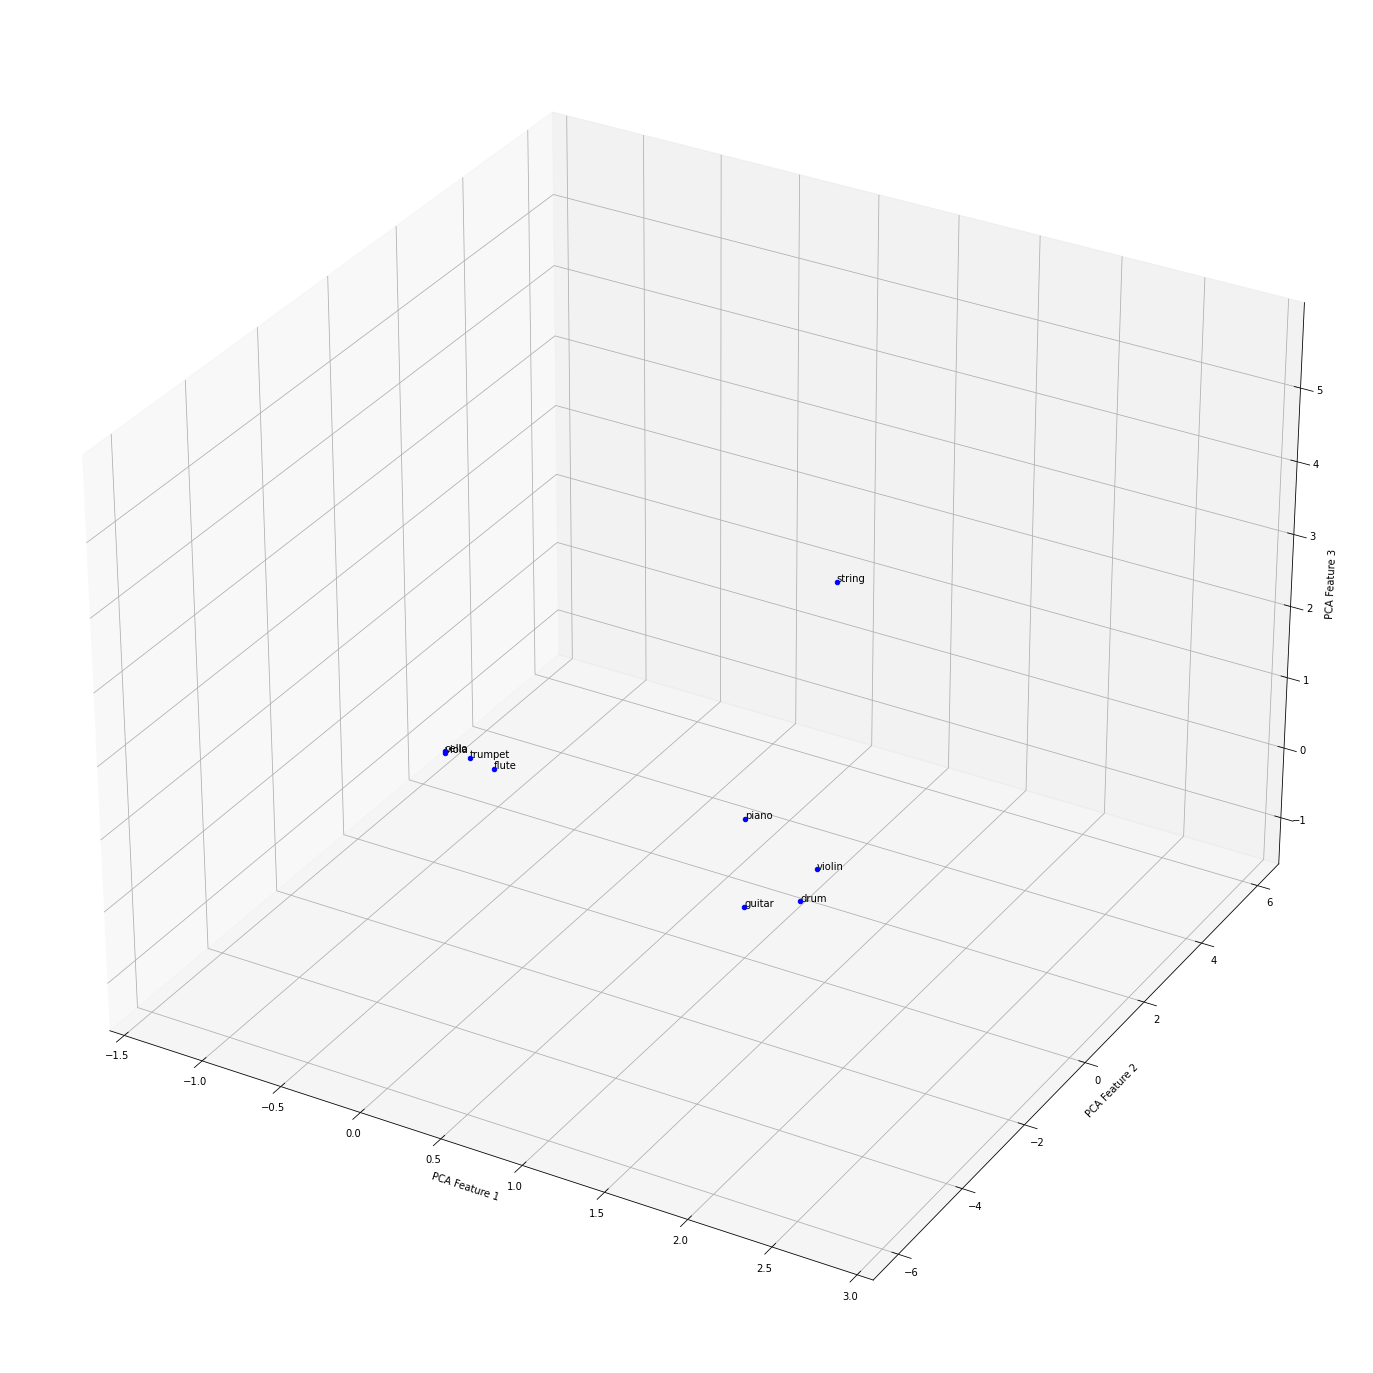

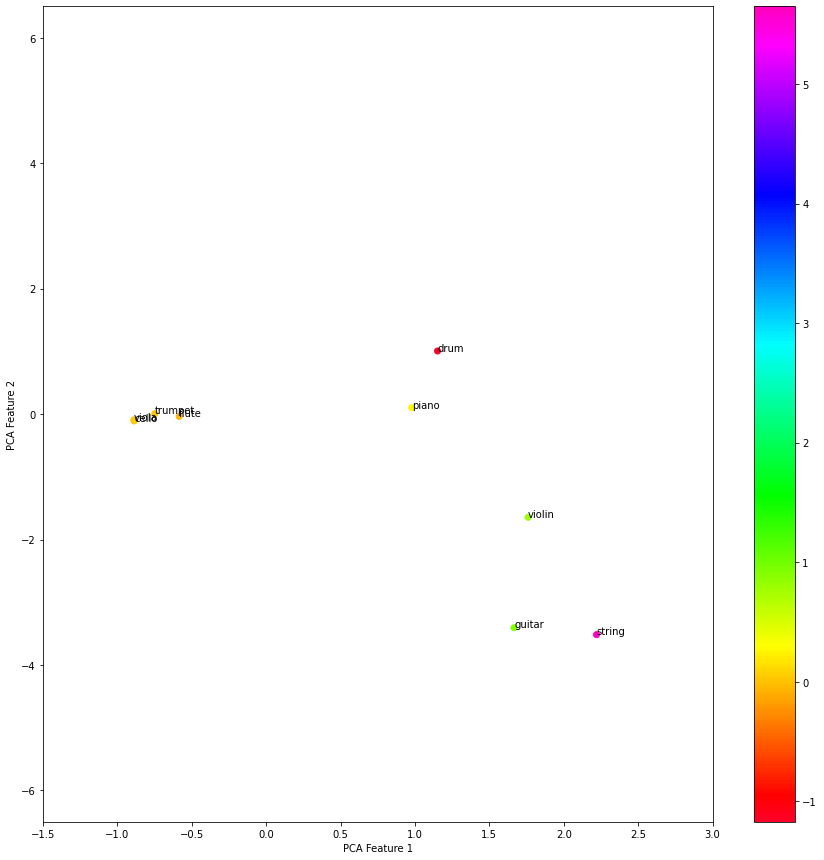

In [43]:
%matplotlib inline
show_words(['guitar', 'piano', 'string', 'violin', 'viola', 'cello', 'drum', 'flute', 'trumpet'], size_2d=(15, 15))

-2
['good', 'great', 'nice', 'well', 'excellent', 'love', 'perfect', 'comfortable', 'durable', 'smooth', 'remarkable', 'bad', 'terrible', 'horrible', 'flimsy', 'inferior', 'uncomfortable', 'difficult', 'waste', 'suck', 'clunky', 'unusable', 'dead', 'unnecessary']
[ 1.7262993   1.6679394   1.6518492   1.7696035   1.2902467   1.36637
  1.2264459   1.6941279   1.6143057   1.736972   -0.743771    1.1333709
  0.7068802   0.5320297   0.8626418  -0.5150557   0.21080656  1.4214728
  0.32918376  0.61328405 -0.82098716 -0.1830074   1.0935681  -0.17480561]
[ 0.1197456   0.3033337  -0.56426555 -1.1302586   0.6869665  -0.7923876
 -0.93460816 -2.5588307  -0.91497606  0.8211144   0.0515543   1.1955591
 -0.0344706   0.10490733 -0.40927115  0.01923722 -0.25479588 -0.65283203
 -0.14683887  0.68438786 -0.06228359  0.13602376 -0.08623531  0.15392119]
[ 0.8871785   0.85758513  0.860392   -0.9369229  -0.20054379  2.069924
 -0.50059223  0.47209167 -0.02493085  1.8272293   0.04132202  1.0671506
  0.18270504 -

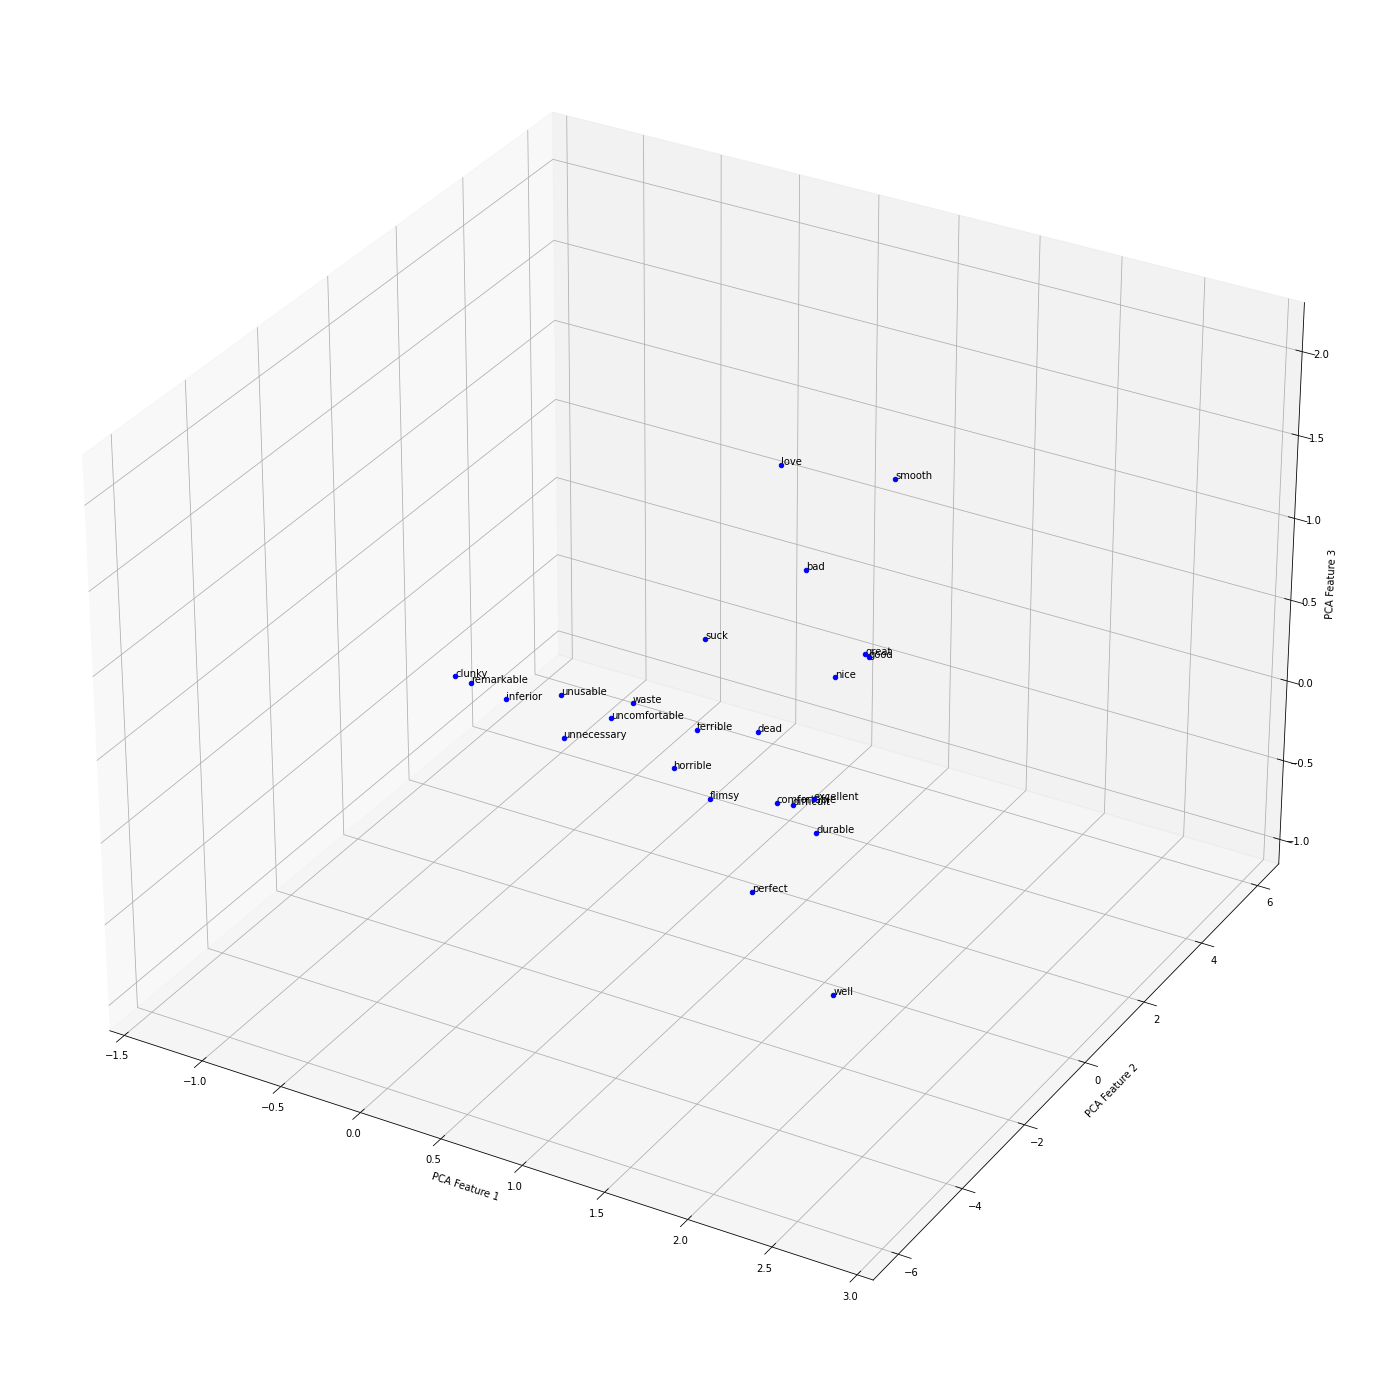

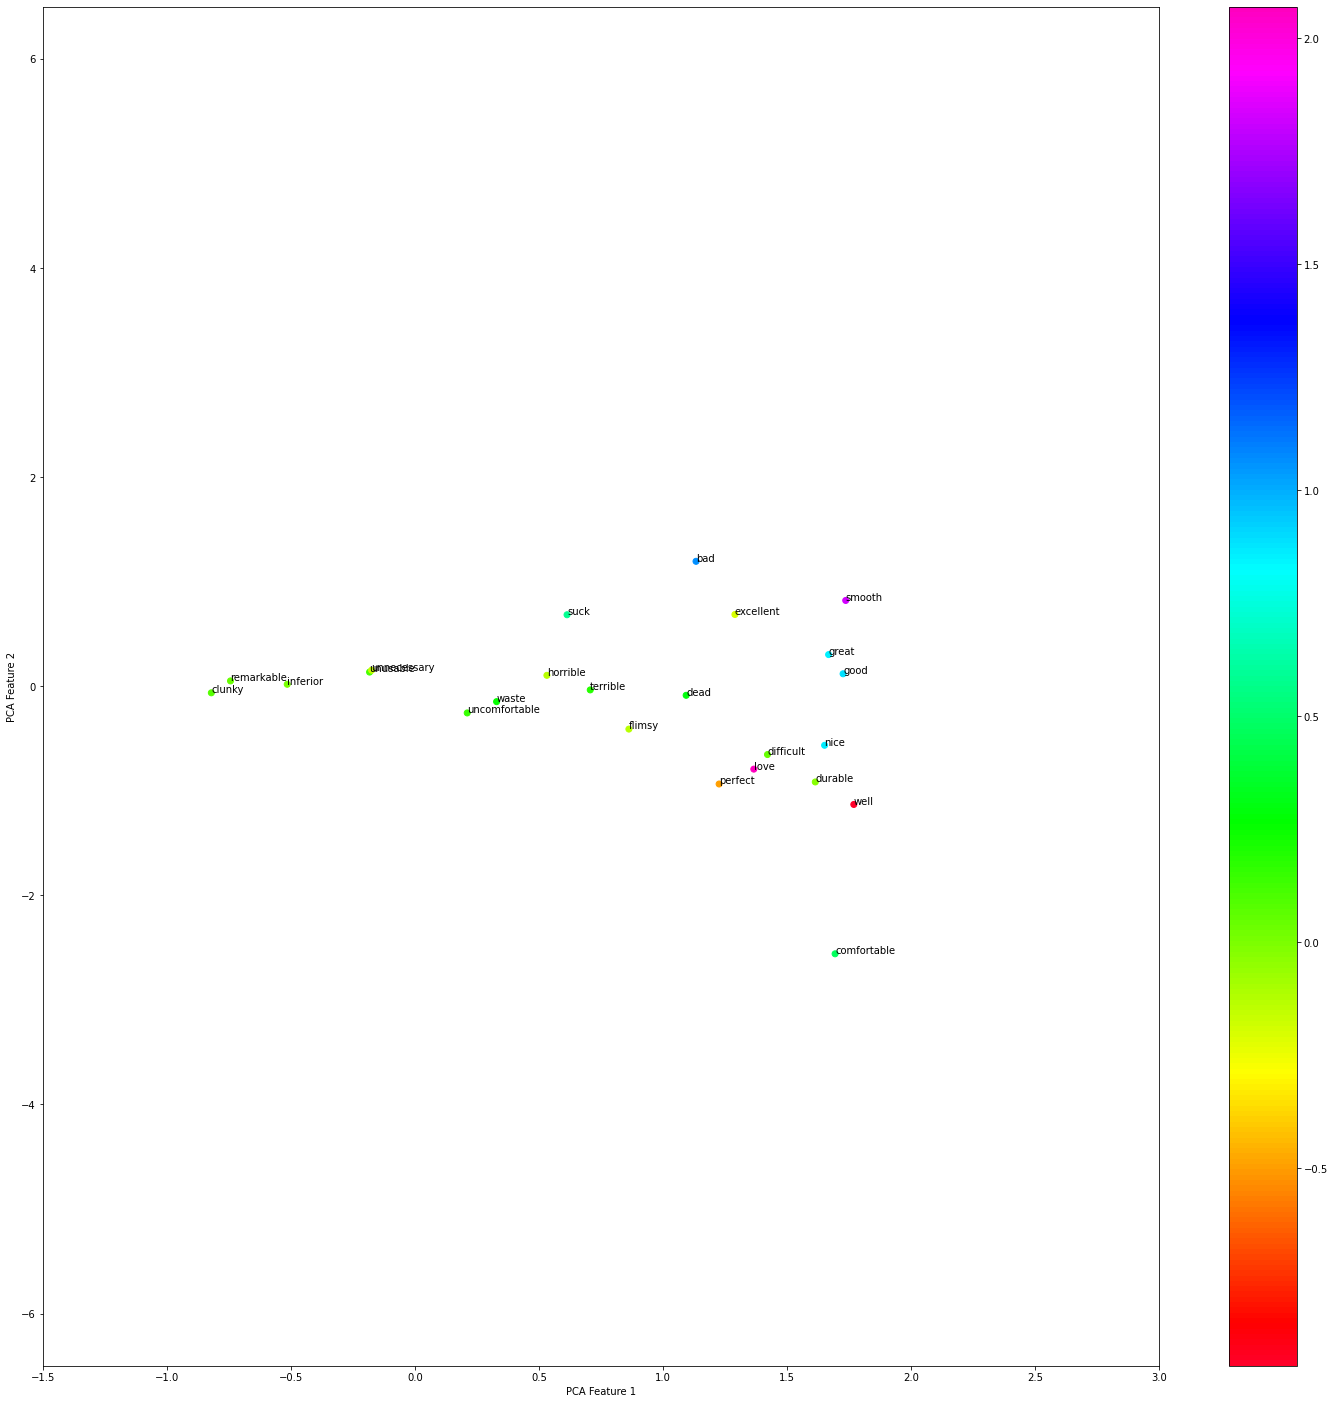

In [44]:
%matplotlib inline
pos_words = ['good', 'great', 'nice', 'well', 'excellent', 'love', 'perfect', 'comfortable', 'durable', 'smooth', 'remarkable']
neg_words = ['bad', 'terrible', 'horrible', 'flimsy', 'inferior', 'uncomfortable', 'difficult', 'waste', 'suck', 'clunky', 'unusable', 'dead', 'unnecessary']
print(len(pos_words) - len(neg_words))
show_words(pos_words + neg_words, size_2d=(25, 25))

In [45]:
str(model.wv.index_to_key[:200]) # Most common words

"['guitar', 'one', 'string', 'sound', 'great', 'like', 'good', 'use', 'pedal', 'well', 'work', 'get', 'amp', 'would', 'price', 'pick', 'really', 'little', 'much', 'time', 'quality', 'tone', 'also', 'used', 'make', 'cable', 'nice', 'better', 'tuner', 'stand', 'doe', 'strap', 'need', 'thing', 'easy', 'using', 'play', 'bought', 'product', 'mic', 'even', 'year', 'buy', 'playing', 'look', 'want', 'way', 'set', 'acoustic', 'made', 'still', 'got', 'case', 'say', 'love', 'right', 'feel', 'instrument', 'bit', 'back', 'two', 'lot', 'bass', 'fit', 'first', 'best', 'problem', 'could', 'come', 'put', 'fender', 'enough', 'small', 'around', 'recommend', 'without', 'long', 'end', 'think', 'new', 'give', 'hold', 'effect', 'tune', 'cheap', 'last', 'keep', 'light', 'another', 'capo', 'know', 'take', 'high', 'different', 'pretty', 'power', 'find', 'review', 'many', 'perfect', 'fine', 'electric', 'looking', 'far', 'sure', 'see', 'try', 'microphone', 'something', 'never', 'though', 'recording', 'clean', 'lo

['guitar', 'piano', 'string', 'pedal', 'tuner', 'pick', 'acoustic', 'cable', 'tuner', 'instrument', 'capo', 'bass', 'speaker', 'board', 'metal', 'mic', 'microphone', 'knob', 'tube', 'volume', 'box', 'unit', 'switch', 'plastic', 'electric', 'music', 'line', 'plug', 'power', 'finger', 'bos', 'screw', 'studio', 'behringer', 'battery', 'control', 'bag', 'note', 'player', 'practice']
[1.666219  0.9777175 2.220336  1.8084463 1.545298  1.8958422 2.2496984
 1.7046405 1.545298  1.3012557 1.847498  1.5094849 1.4487232 1.3828254
 1.5519922 1.7209873 1.7170813 1.9545494 2.081704  2.361193  1.0000812
 1.1347879 1.2509588 1.4848748 2.539878  1.3242284 1.099253  1.3835897
 2.3079536 1.7723776 1.5918864 1.6148127 1.6293117 1.4861    1.7575213
 1.8835179 2.0753574 1.2565908 1.47578   1.2629843]
[-3.4051278   0.10105757 -3.5161824   4.907057   -3.4965112  -4.035608
 -3.0275671   1.5081909  -3.4965112  -1.9681472  -4.5404415   0.32423776
  3.8769224   2.617514    1.40137     1.4495724   1.9702328   3.760

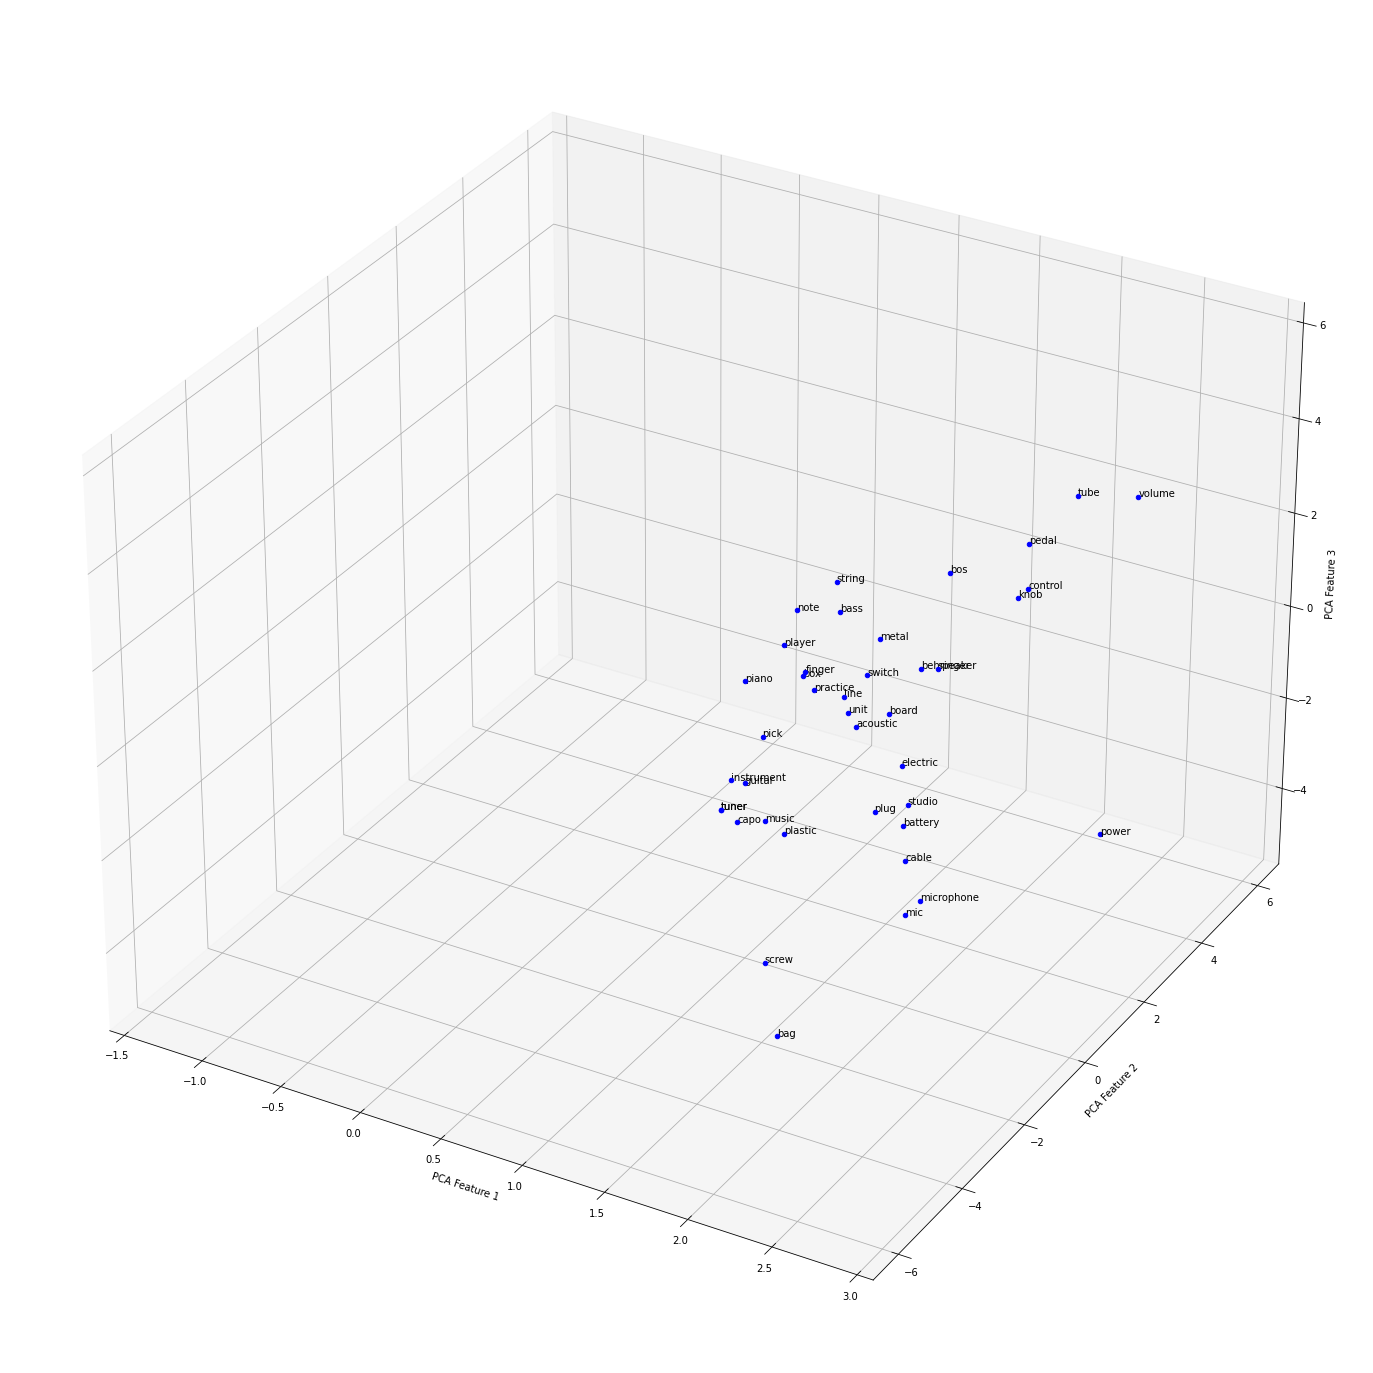

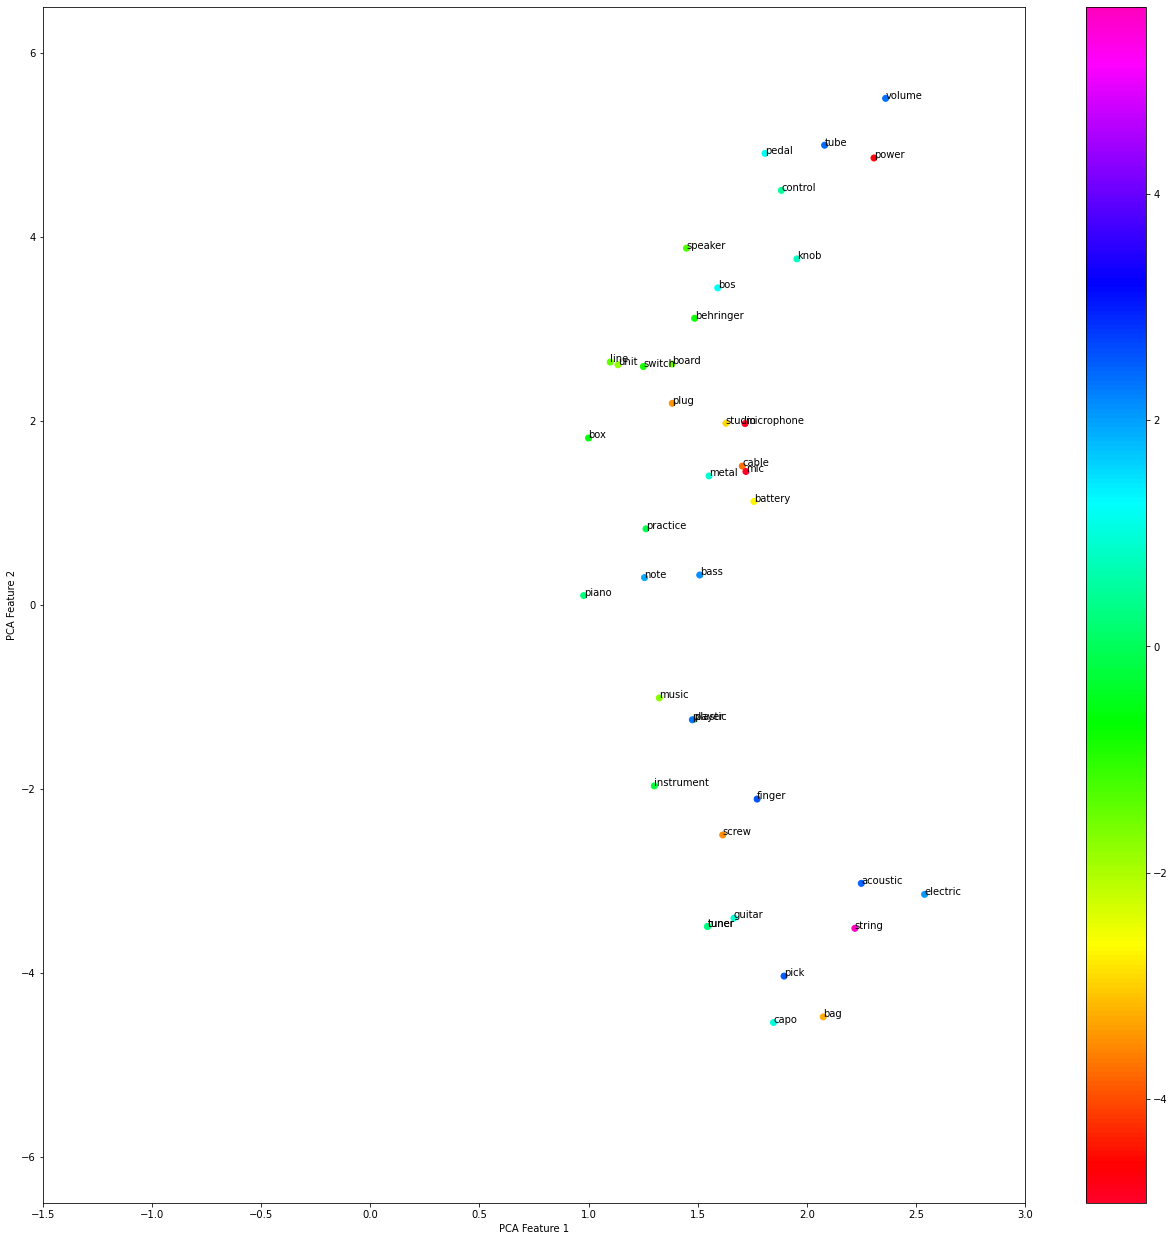

In [51]:
%matplotlib inline
show_words(['guitar', 'piano', 'string', 'pedal', 'tuner', 'pick', 'acoustic', 'cable', 'tuner',
            'instrument', 'capo', 'bass', 'speaker', 'board', 'metal', 'mic', 'microphone', 'knob', 'tube',
            'volume', 'box', 'unit', 'switch', 'plastic', 'electric', 'music', 'line', 'plug', 'power',
            'finger', 'bos', 'screw', 'studio', 'behringer', 'battery', 'control', 'bag', 'note', 'player', 'practice'], size_2d=(22, 22))